## Look at peak distribution of VB profiles
to asist with battery stratagey design

In [17]:
import morePVs_output as opm
import morePVs as mpv
import os
import en_utilities as um
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.lines as mlines
import matplotlib.dates as mdates
import shutil
import seaborn as sns

In [51]:
# paths for data and output
bpath = 'C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\load_profiles'
apath = 'C:\\Users\\z5044992\\Documents\\MainDATA\\DATA_EN_4\\analysis'
ppath = os.path.join(apath, 'freq_dists')
# paths for peak demand files  
pf10 = 'peak_time_10.csv'
peakFile10 = os.path.join(apath, pf10)
peakFile10s={'summer': os.path.join(apath, 'summer_peak_time_10.csv'),
             'winter': os.path.join(apath, 'wiinter_peak_time_10.csv')}
# Set up dfs for output
sites = ['A', 'B','C','D','E','F','G','H','I','J']
#sites = ['F','G','H','I','J']

site_tag ={'A': 'a208_f12_cp34',
 'B': 'a104_f8_cp57',
 'C': 'a34_f4_cp33',
 'D': 'a138_f9_cp44',
 'E': 'a161_f7_cp38',
 'F': 'a20_f5_cp36',
 'G': 'a44_f4_cp17',
 'H': 'a52_f3_cp26',
 'I': 'a48_f4_cp09',
 'J': 'a26_f4_cp43'}

dfpt10 = pd.DataFrame(columns = sites)

In [52]:
# Create df and csv with times of 10 highest peaks in 50 VBs at each site
# for site in sites:
#     lpath = os.path.join(bpath,'sh_t_all_site_'+site)
#     vblist = os.listdir(lpath)
#     tlist = []
#     for f in vblist:
#         fn = os.path.join(lpath,f)
#         df = pd.read_csv(fn)
#         df = df.set_index('timestamp')
#         dfs=df.sum(axis=1).sort_values(ascending=False)
#         tlist += [pd.Timestamp(dfs.index[i]).hour + pd.Timestamp(dfs.index[i]).minute/60 \
#                for i in range (10)]
#     dfpt10[site] = tlist
# dfpt10.to_csv(peakFile10)

In [53]:
# # Create df and csv with times of 10 highest peaks in 50 VBs at each site
# # FOR SUMMER AND WINTER
# months = {'summer': [4,5,6,7,8,9],
#          'winter': [1,2,3,10,11,12]}
# dfpt10s={}
# for season in ['summer', 'winter']:
#     dfpt10s[season] = pd.DataFrame(columns = sites)
#     m= months[season]
#     for site in sites:
#         lpath = os.path.join(bpath,'sh_t_all_site_'+site)
#         vblist = os.listdir(lpath)
#         tlist = []
#         for f in vblist:
#             fn = os.path.join(lpath,f)
#             df = pd.read_csv(fn)
#             df = df.set_index('timestamp')
#             df['ts']= df.index
#             df['month'] = df.ts.apply(lambda x: pd.Timestamp(x).month)
#             df= df.loc[df.month.isin(m)]
#             dfs=df.sum(axis=1).sort_values(ascending=False)
#             tlist += [pd.Timestamp(dfs.index[i]).hour + pd.Timestamp(dfs.index[i]).minute/60 \
#                    for i in range (10)]
#         dfpt10s[season][site] = tlist
#     dfpt10s[season].to_csv(peakFile10s[season])

In [20]:
# read file with peak times
dfpt10 = pd.read_csv(peakFile10, index_col = [0])
dfpt10.head()

,A,B,C,D,E,F,G,H,I,J
0,19.5,19.0,18.5,18.0,18.5,23.0,18.5,20.0,18.0,17.0
1,19.0,18.5,22.5,18.0,18.5,23.5,18.0,19.5,17.5,17.5
2,18.0,17.5,22.0,18.0,20.0,23.5,18.0,20.5,20.0,17.5
3,19.0,18.0,17.0,17.5,18.5,23.0,19.0,19.5,17.5,18.0
4,19.5,19.0,19.0,20.0,17.5,23.0,19.5,20.0,17.0,19.0


In [21]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

,mean,median,colour,tag
A,19:00,19:00,NaN,NaN
B,19:03,19:00,NaN,NaN
C,19:18,19:00,NaN,NaN
D,18:59,19:00,NaN,NaN
E,18:53,18:30,NaN,NaN
F,18:59,19:00,NaN,NaN
G,19:03,19:00,NaN,NaN
H,18:59,18:45,NaN,NaN
I,19:27,19:00,NaN,NaN
J,18:05,17:30,NaN,NaN


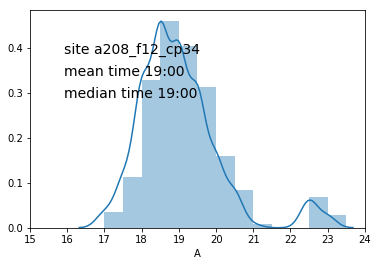

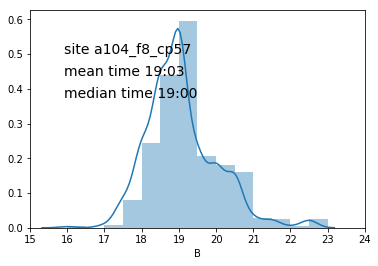

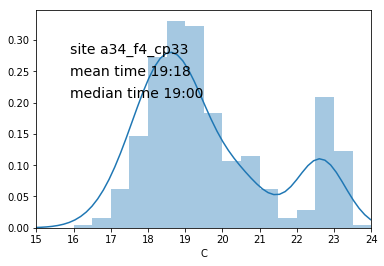

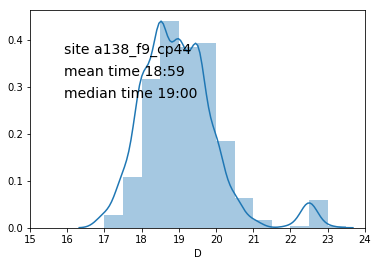

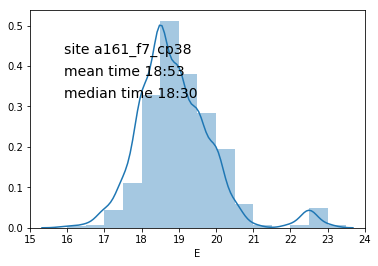

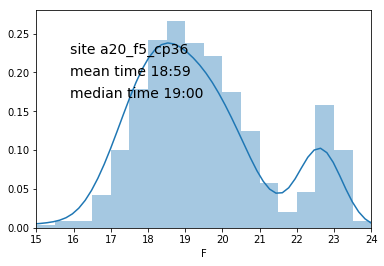

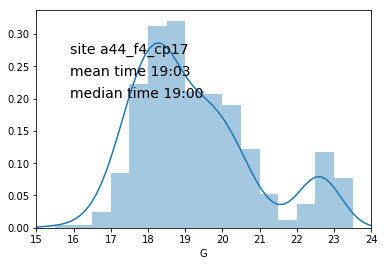

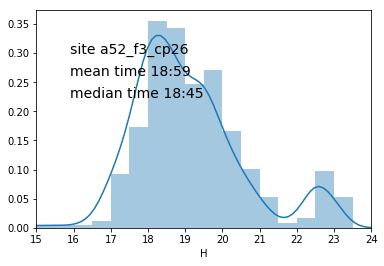

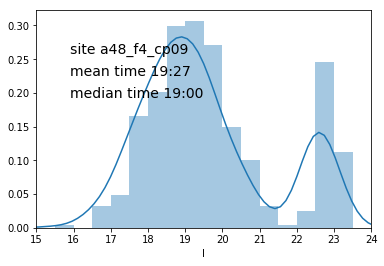

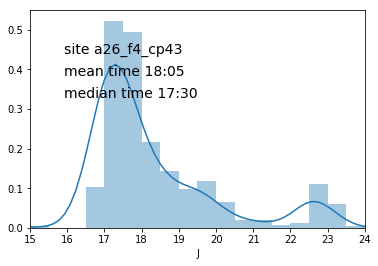

In [34]:
# This for whole year:
dfs = pd.DataFrame (index = sites,
                    columns = ['mean', 'median', 'colour', 'tag'])
# Plot frequency dist

for site in sites:
    fig, ax = plt.subplots()
    mean = str(int(dfpt10[site].mean())).zfill(2) + \
        ':' +  str(int((dfpt10[site].mean()-int(dfpt10[site].mean()))*60)).zfill(2)
    median  = str(int(dfpt10[site].median())).zfill(2) + \
        ':' +  str(int((dfpt10[site].median()-int(dfpt10[site].median()))*60)).zfill(2)
    dfs.loc[site, 'mean'] = mean
    dfs.loc[site, 'median'] = median
    ax = sns.distplot(dfpt10[site],
                     hist_kws= {'range':(15,24)},
                               bins=18)
    ax.set_xlim(15,24)
    ax.text(0.1,0.8,'site '+ site_tag[site], fontsize=14,transform=ax.transAxes)
    ax.text(0.1,0.7,'mean time '+ mean, fontsize=14,transform=ax.transAxes)
    ax.text(0.1,0.6,'median time '+ median, fontsize=14,transform=ax.transAxes)
    pfile = os.path.join(ppath,'peak_time_freq_dist_'+ site + '.jpg')
    plt.savefig(pfile, dpi=1000)
sfile = os.path.join(apath,'time_stats.csv')
dfs.to_csv(sfile)
dfs

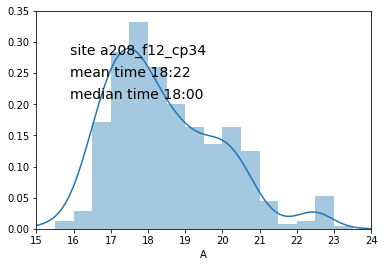

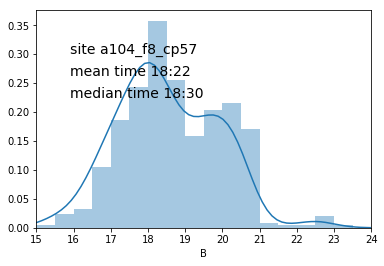

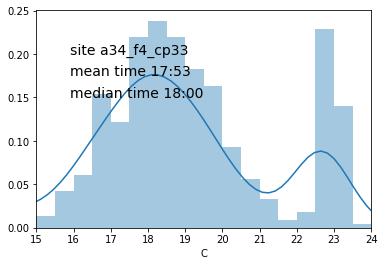

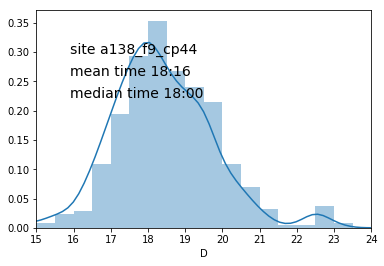

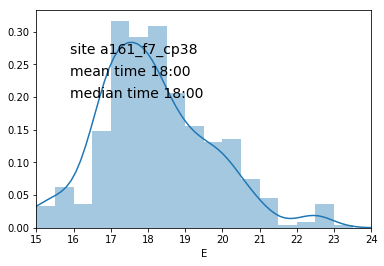

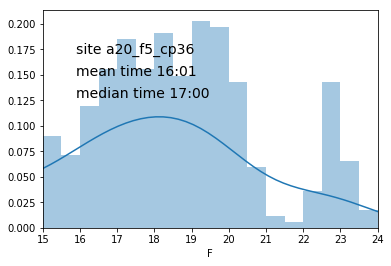

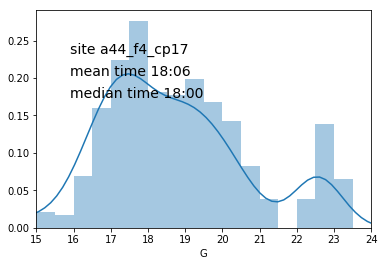

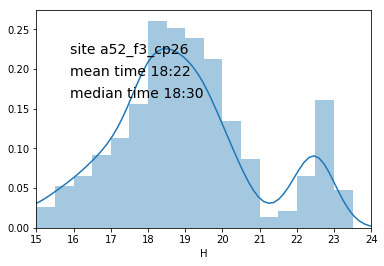

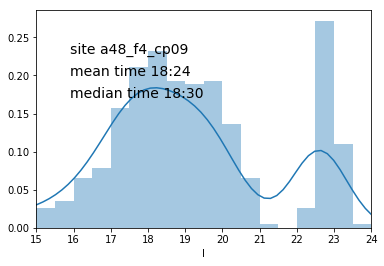

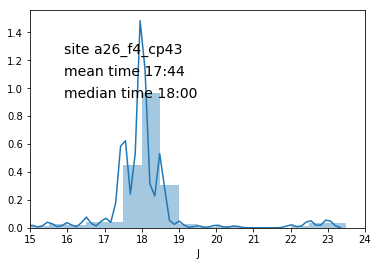

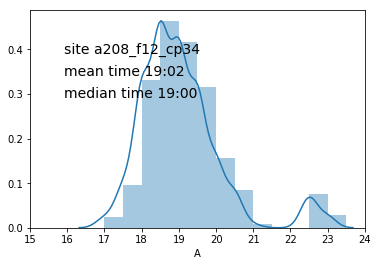

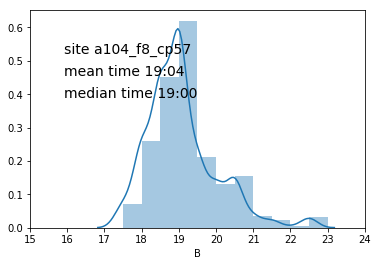

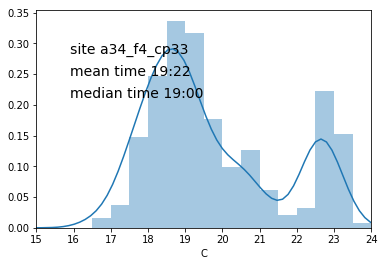

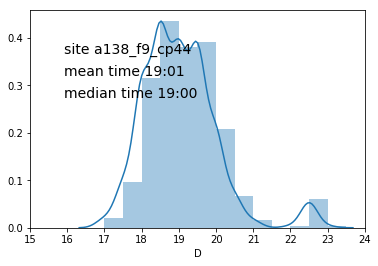

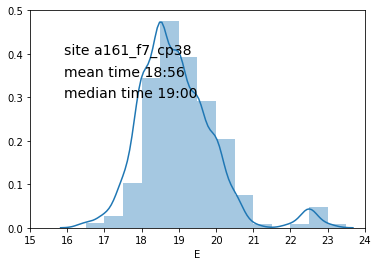

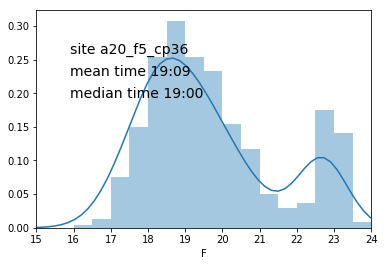

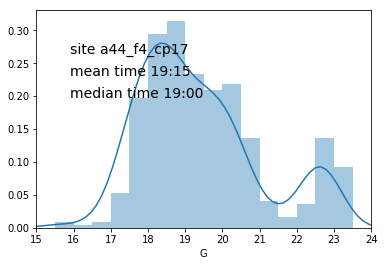

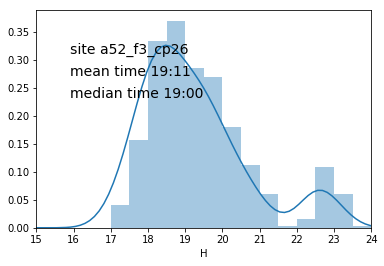

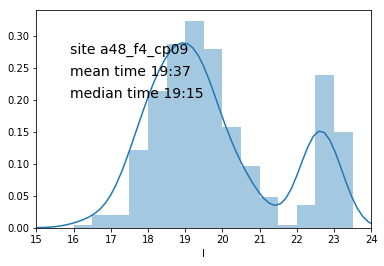

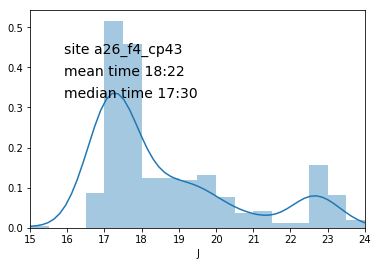

In [56]:
# This for summer & winter
# -------------------------
for season in ['winter', 'summer']:

    dfs = pd.DataFrame (index = sites,
                        columns = ['mean', 'median', 'colour', 'tag'])
    # Plot frequency dist

    for site in sites:
        fig, ax = plt.subplots()
        mean = str(int(dfpt10s[season][site].mean())).zfill(2) + \
            ':' +  str(int((dfpt10s[season][site].mean()-int(dfpt10s[season][site].mean()))*60)).zfill(2)
        median  = str(int(dfpt10s[season][site].median())).zfill(2) + \
            ':' +  str(int((dfpt10s[season][site].median()-int(dfpt10s[season][site].median()))*60)).zfill(2)
        dfs.loc[site, 'mean'] = mean
        dfs.loc[site, 'median'] = median
        ax = sns.distplot(dfpt10s[season][site],
                         hist_kws= {'range':(15,24)},
                                   bins=18)
        ax.set_xlim(15,24)
        ax.text(0.1,0.8,'site '+ site_tag[site], fontsize=14,transform=ax.transAxes)
        ax.text(0.1,0.7,'mean time '+ mean, fontsize=14,transform=ax.transAxes)
        ax.text(0.1,0.6,'median time '+ median, fontsize=14,transform=ax.transAxes)
        pfile = os.path.join(ppath,season+'_peak_time_freq_dist_'+ site + '.jpg')
        plt.savefig(pfile, dpi=1000)
    sfile = os.path.join(apath,'time_stats_'+season+'.csv')
    dfs.to_csv(sfile)
